Load and Initial Data Overview

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/lili/Downloads/Telegram Desktop/data mining/data/healthcare-dataset-stroke-data.csv')

# Display the first few rows of the data
data.head()



stroke
0    4861
1     249
Name: count, dtype: int64

Check and Fill Null Values

In [62]:
# Check for null values
null_counts = data.isnull().sum()
print("Null values per column:\n", null_counts[null_counts > 0])

# Fill missing values in 'bmi' column with the median
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
# Confirm that there are no null values
data.isnull().sum()


Null values per column:
 bmi    201
dtype: int64


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Remove Unnecessary id Column

In [63]:
# Remove the 'id' column as it is non-informative
data = data.drop(columns=['id'])

# Display the final cleaned data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Identify and Display Outliers

In [64]:
# List of numeric features
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Identify outliers for each numeric feature
outliers = {}
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    
# Display count of outliers in each column
for column, outlier_data in outliers.items():
    print(f"{column}: {outlier_data.shape[0]} outliers")

print(data['stroke'].value_counts())

age: 0 outliers
hypertension: 498 outliers
heart_disease: 276 outliers
avg_glucose_level: 627 outliers
bmi: 126 outliers
stroke: 249 outliers
stroke
0    4861
1     249
Name: count, dtype: int64


Remove Outliers

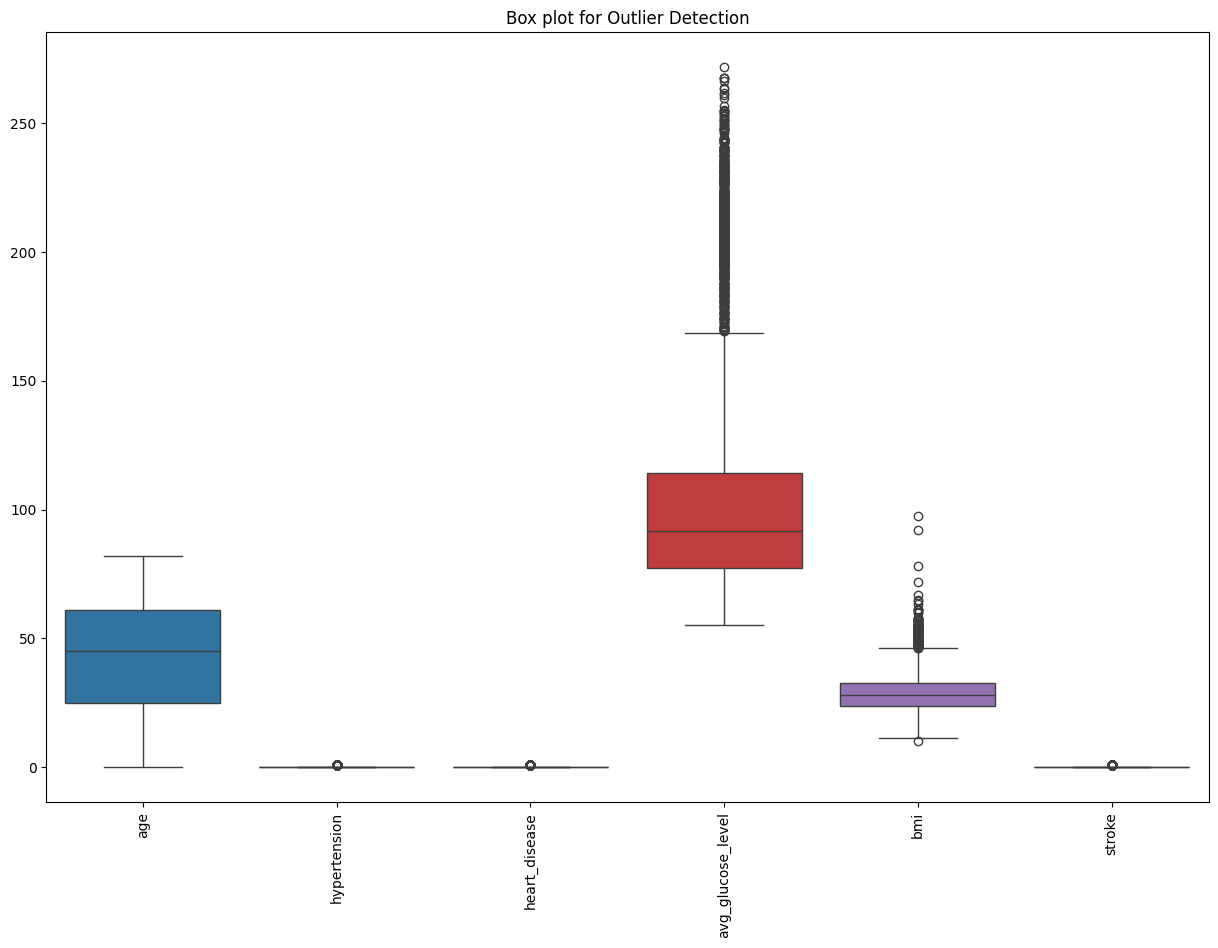

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Box plot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

In [66]:
# Replace outliers in only 'bmi' and 'avg_glucose_level' columns
for column in ['bmi', 'avg_glucose_level']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Apply capping: replace values below lower limit with lower_limit, and above upper limit with upper_limit
    data[column] = data[column].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Display data after replacing outliers
data.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


Encode Categorical Variables

In [67]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status', 'ever_married']

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display data after encoding
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,169.3575,36.6,1,1
1,0,61.0,0,0,1,3,0,169.3575,28.1,2,1
2,1,80.0,0,1,1,2,0,105.9200,32.5,2,1
3,0,49.0,0,0,1,2,1,169.3575,34.4,3,1
4,0,79.0,1,0,1,3,0,169.3575,24.0,2,1


Standardize Numeric Features

In [68]:
from sklearn.preprocessing import StandardScaler

# Standardize numeric features
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

# Display the data after scaling
data[['age', 'avg_glucose_level', 'bmi']].head()


,age,avg_glucose_level,bmi
0,1.051434,2.058363,1.110872
1,0.786070,2.058363,-0.082921
2,1.626390,0.148256,0.535043
3,0.255342,2.058363,0.801890
4,1.582163,2.058363,-0.658751


In [69]:
# Save the cleaned data to a CSV file
data.to_csv('cleaned_data.csv', index=False)

print("Cleaned data has been saved as 'cleaned_data.csv'")


Cleaned data has been saved as 'cleaned_data.csv'
